In [2]:
import torch
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

# Problem 1

In [138]:
def gradients(f):
    def wrapper(x):
        (x := torch.tensor([x], dtype=float).flatten()).requires_grad_(True)
        (y := f(x)).backward()
        return y.item(), x.grad.numpy()

    return wrapper


@gradients
def rational(x):
    numerator = x**5 - 2 * x**3 + x
    denominator = x**4 + 3 * x**2 + 1
    return torch.sum(numerator / denominator)


@gradients
def schwefel(x):
    return torch.sum(x * torch.sin(torch.sqrt(torch.abs(x))))


@gradients
def rastrigin(x):
    return 10 * len(x) + torch.sum(x**2 - 10 * torch.cos(2 * torch.pi * x))


@gradients
def griewank(x):
    indices = torch.arange(len(x)) + 1
    return torch.sum(x**2) / 4000 - torch.prod(torch.cos(x) / torch.sqrt(indices)) + 1


@gradients
def rosenbrock(x):
    y = 100 * (x**2 - torch.roll(x, -1)) ** 2 + (x - 1) ** 2
    return torch.sum(y[:-1])


@gradients
def double_sigmoid(x, a=10, b=-10):
    def sigmoid(x):
        return 1 / (1 + torch.exp(-x))

    return (sigmoid(x + a) + sigmoid(x + b)) / 2

# Problem 3

In [4]:
def gradient_descent(function, learning_rate, num_iterations=10000, x=123):
    def step():
        nonlocal x
        val, grad = function(x)
        x -= learning_rate * grad
        return val

    return [step() for _ in range(num_iterations)]

### Gradient descent run

/tmp/ipykernel_11028/1328707255.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  (x := torch.tensor([x], dtype=float).flatten()).requires_grad_(True)


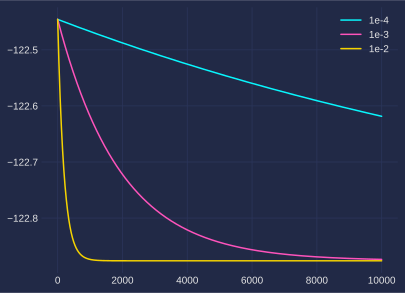

In [5]:
plt.plot(gradient_descent(schwefel, 1e-4), label="1e-4")
plt.plot(gradient_descent(schwefel, 1e-3), label="1e-3")
plt.plot(gradient_descent(schwefel, 1e-2), label="1e-2")
plt.legend()

### Convergence regions

In [120]:
def apply(f, it):
    return torch.tensor(list(map(f, it)))


def descent(f, lr=1e-1):
    return lambda x: gradient_descent(f, lr, x=x, num_iterations=1000)[-1]


def experiment(f, lr=1e-1, range=(-100, 100)):
    x = torch.linspace(*range, 100)
    y = apply(f, x)[:, 0]
    plt.plot(x, y)
    y = apply(descent(f, lr=lr), x)
    plt.plot(x, y)

#### Rational function

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


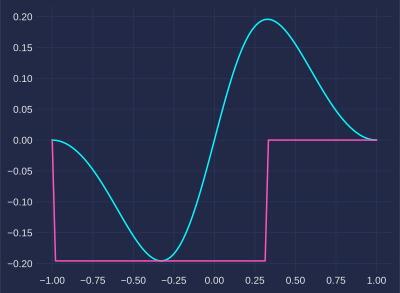

In [106]:
experiment(rational, lr=1e-1, range=(-1, 1))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


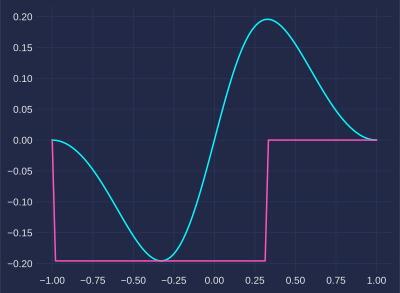

In [87]:
experiment(rational, lr=1e-2, range=(-1, 1))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


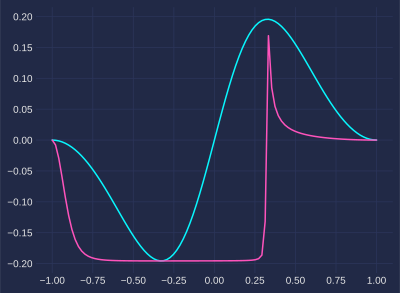

In [88]:
experiment(rational, lr=1e-3, range=(-1, 1))

#### Schwefel

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


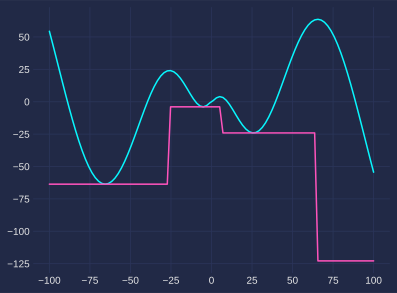

In [70]:
experiment(schwefel, lr=1e-1, range=(-100, 100))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


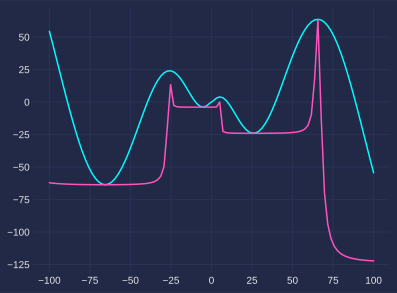

In [71]:
experiment(schwefel, lr=1e-2, range=(-100, 100))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


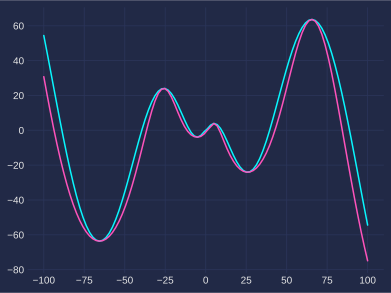

In [72]:
experiment(schwefel, lr=1e-3, range=(-100, 100))

#### Rastrigin

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


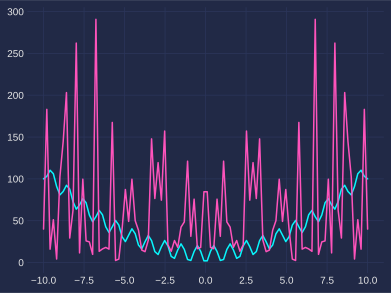

In [73]:
experiment(rastrigin, lr=1e-1, range=(-10, 10))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


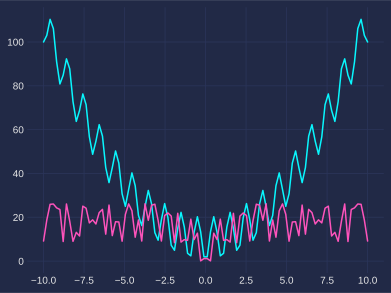

In [74]:
experiment(rastrigin, lr=1e-2, range=(-10, 10))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


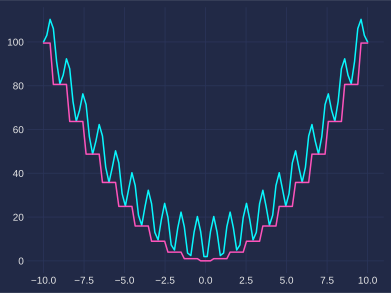

In [75]:
experiment(rastrigin, lr=1e-3, range=(-10, 10))

#### Griewank

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


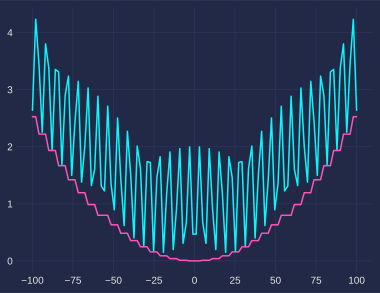

In [79]:
experiment(griewank, lr=1e-1, range=(-100, 100))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


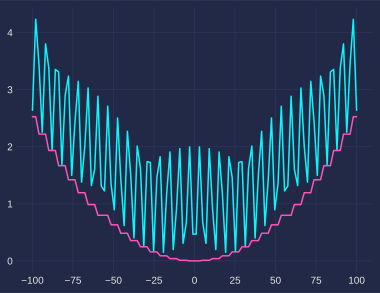

In [80]:
experiment(griewank, lr=1e-2, range=(-100, 100))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


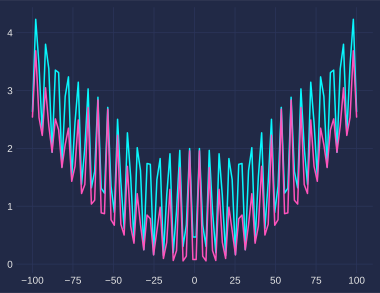

In [81]:
experiment(griewank, lr=1e-3, range=(-100, 100))

#### Sigmoid

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


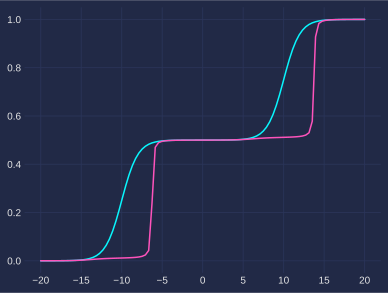

In [140]:
experiment(double_sigmoid, lr=1e-1, range=(-20, 20))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


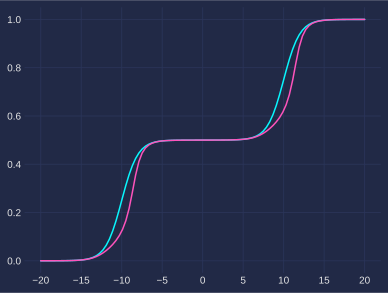

In [141]:
experiment(double_sigmoid, lr=1e-2, range=(-20, 20))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


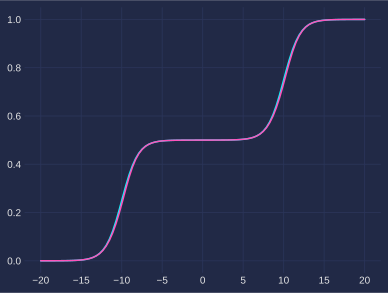

In [142]:
experiment(double_sigmoid, lr=1e-3, range=(-20, 20))

# Problem 4

In [200]:
def momentum_gradient_descent(
    function, learning_rate, µ=0.9, acc=1.1, num_iterations=10000, x=123
):
    v = 0

    def step():
        nonlocal x
        nonlocal µ
        nonlocal v
        val, grad = function(x)
        v = acc * µ * v + (1 - µ) * grad
        x -= learning_rate * v
        return val

    return [step() for _ in range(num_iterations)]


def mdescent(f, lr=1e-1):
    return lambda x: momentum_gradient_descent(f, lr, x=x, num_iterations=1000)[-1]


def mexperiment(f, lr=1e-1, range=(-100, 100)):
    x = torch.linspace(*range, 100)
    y = apply(f, x)[:, 0]
    plt.plot(x, y)
    y = apply(mdescent(f, lr=lr), x)
    plt.plot(x, y)

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


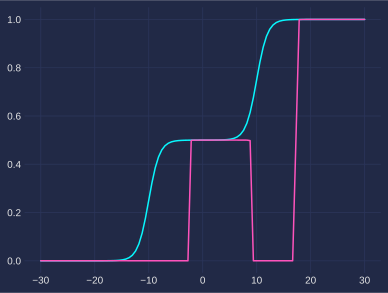

In [201]:
mexperiment(double_sigmoid, lr=0.5, range=(-30, 30))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


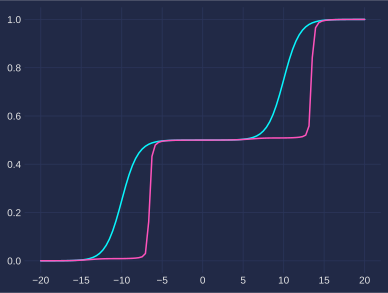

In [202]:
mexperiment(double_sigmoid, lr=1e-2, range=(-20, 20))

/tmp/ipykernel_11028/882284360.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return torch.tensor(list(map(f, it)))


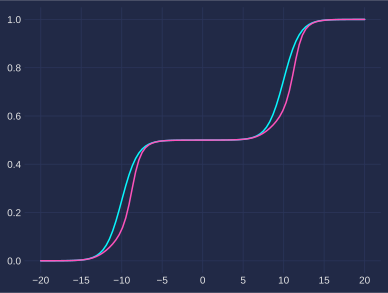

In [203]:
mexperiment(double_sigmoid, lr=1e-3, range=(-20, 20))